<a href="https://colab.research.google.com/github/LEEINSEO-0118/ML_study/blob/main/Titanic_Survivor_Prediction_PJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('/content/drive/MyDrive/ai부트캠프/Machine_Learning/DATA/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ai부트캠프/Machine_Learning/DATA/titanic/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ai부트캠프/Machine_Learning/DATA/titanic/gender_submission.csv')

0    549
1    342
Name: Survived, dtype: int64

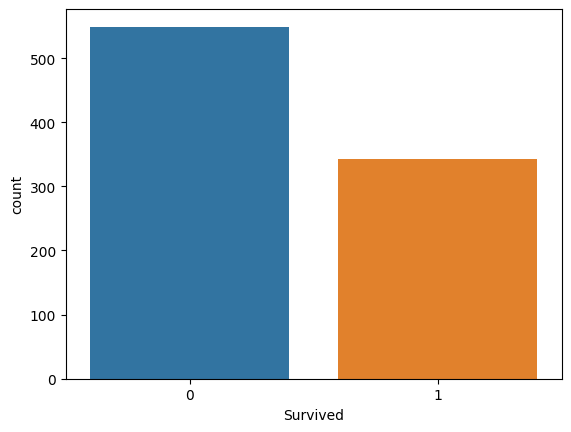

In [8]:
# 1. 결측치
train[train.isnull().any(axis = 1)]

# 2. dtype이 object인 columns 찾기
train.loc[:, train.dtypes == 'object'] # dataframe
train.columns[train.dtypes == 'object'] # columns

# 3. target value distribution 체크
sns.countplot(data = train, x = 'Survived') # 2진 분류 모델이기에 count_plot
train.Survived.value_counts()

In [9]:
# feature engineering
# 1. Cabin column의 결측치 여부가 Survived에 영향이 있는가?
train.loc[train.Cabin.isnull(), 'Survived'].mean(), train.loc[train.Cabin.notnull(), 'Survived'].mean()

# 2. Cabin이 있는 사람이 평균적으로 생존 비율이 높다. Cabin값이 있으면 1, 없으면 0 값을 가지는 is_Cabin column 만들기
train['is_Cabin'] = train.Cabin.notnull() * 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [10]:
# 3. Sibsp + Parch = FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch']

In [11]:
# 4. drop columns
drop_cols = ['PassengerId', 'Name', 'Cabin', 'SibSp', 'Parch', 'Ticket']
train = train.drop(columns = drop_cols)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,is_Cabin,FamilySize
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,0
887,1,1,female,19.0,30.0000,S,1,0
888,0,3,female,NaN,23.4500,S,0,3
889,1,1,male,26.0,30.0000,C,1,0


In [12]:
# 5. Age column
train.Age = train.Age.fillna(train.Age.median())
# train.Age.describe()

In [13]:
# 6. dropna
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   is_Cabin    889 non-null    int64  
 7   FamilySize  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [14]:
# 7.Encoding categorical feature

# 1) Ordinal encoding
train.Sex = pd.factorize(train.Sex, sort = True)[0] # Sort를 하면 알파벳 순으로
# _map # 직접 규칙을 줘서 변환
# _map = {'male' : 1, 'female' : 2}
# train.Sex = train.Sex.map(_map)

# 2) One-hot encoding
train = pd.get_dummies(data = train, columns = ['Embarked'])
train

<ipython-input-14-0b236382b8f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Sex = pd.factorize(train.Sex, sort = True)[0] # Sort를 하면 알파벳 순으로


,Survived,Pclass,Sex,Age,Fare,is_Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,1,0,0,1
1,1,1,0,38.0,71.2833,1,1,1,0,0
2,1,3,0,26.0,7.9250,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,1,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,0,0,0,1
887,1,1,0,19.0,30.0000,1,0,0,0,1
888,0,3,0,28.0,23.4500,0,3,0,0,1
889,1,1,1,26.0,30.0000,1,0,1,0,0


In [15]:
# data setting for training
from sklearn.model_selection import train_test_split

X = train.drop(columns = 'Survived') # feature vector
y = train.Survived # target value

# 트테트테 (우리 데이터는 테스트 데이터가 따로 있어서 여기서는 Validation 데이터를 스플릿)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(711, 9) (178, 9) (711,) (178,)


In [16]:
# training (= fitting)
# sklearn에서 학습을 하는 방법
# 1. 사용할 함수를 불러온다.
# 2. 해당 함수를 선언한다.
# 3. fit()

from sklearn.linear_model import LinearRegression, LogisticRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

lreg = LogisticRegression(random_state = 42, solver = 'liblinear', max_iter = 300)
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=42, solver='liblinear')

In [20]:
# 회귀 성능 비교
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import accuracy_score

print("Linear Regression MSE : %.4f" % mean_squared_error(y_train, reg.predict(X_train))) # Train 데이터에 대한 Lineear regression 결과
print("Logistic Regression MSE : %.4f" % mean_squared_error(y_train, lreg.predict_proba(X_train)[:, 1])) # Train 데이터에 대한 Logistic regression 결과

# Classification Problem을 Linear Regression이 아닌 Logistic Regression으로 예측했을 때 성능이 조금 더 좋다.
print("Train ACC : %.4f" % accuracy_score(y_train, lreg.predict(X_train)))
print("Validation ACC : %.4f" % accuracy_score(y_val, lreg.predict(X_val)))

Linear Regression MSE : 0.1414
Logistic Regression MSE : 0.1401
Train ACC : 0.7989
Validation ACC : 0.8090


In [25]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
## TO-DO : Test 데이터를 X_test로 가공해서 lreg.predict(X_test)가 에러가 나지 않고 출력이 되게 하세요!

X_test = test.copy() # Deep copy 해야 함!!
# 1. is_Cabin column 만들기
X_test.loc[:, 'is_Cabin'] = X_test.Cabin.notna() * 1

# # 2. SibSp + Parch = FamilySize column 만들기
X_test['FamilySize'] = X_test.SibSp + X_test.Parch

# # 3. Sex Ordinary encoding
X_test.loc[:, 'Sex'] = pd.factorize(X_test.Sex, sort = True)[0]

# 4. Embarked One-hot encoding
X_test = pd.get_dummies(data = X_test, columns = ['Embarked'])

# 5. Age 결측치 채우기 (median)
# Train Data에서 train.Age.median을 사용했다면 그 값을 그대로 사용
X_test.Age = X_test.Age.fillna(X_train.Age.median())

# 6. Fare열의 결측히 1개가 포함된 행을 지우기 위해 해당 행과 대응하는 y_test를 삭제하기
# 실제 서비스에서는 버려도 됨, 대회는 버리면 안됨
# numeric feature들이 결측치가 있다면, train data의 median을 사용
X_test['Fare'] = X_test.Fare.fillna(X_train.Fare.median())

# 7. drop feature
X_test = X_test.drop(columns = drop_cols)
# # 8. 결측치 drop
# X_test = X_test.dropna()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   is_Cabin    418 non-null    int64  
 5   FamilySize  418 non-null    int64  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


<ipython-input-26-64406f8943cb>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, 'Sex'] = pd.factorize(X_test.Sex, sort = True)[0]


In [36]:
y_test = submission.iloc[:, 1]
print(f'Logistic Regression MSE : {round(mean_squared_error(y_test, lreg.predict_proba(X_test)[:, 1]), 4)}')
print(f'Test Accuracy : {round(accuracy_score(y_test, lreg.predict(X_test)), 4)}')

Logistic Regression MSE : 0.0762
Test Accuracy : 0.9234


In [39]:
from sklearn.metrics import f1_score
print(f'Test F-1 Score : {round(f1_score(y_test, lreg.predict(X_test)), 4)}')

Test F-1 Score : 0.8974


In [43]:
# Kaggle 제출
output = lreg.predict(X_test)
submission['Survived'] = output
submission.to_csv('titanic_submission.csv', index = False)